In [3]:
from sklearn.datasets import fetch_california_housing

dataset = fetch_california_housing()

dataset.target_names

['MedHouseVal']

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.DataFrame(dataset.data,columns = dataset.feature_names)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
df['Price'] = dataset.target

df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=38)

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train_scaled,y_train)

LinearRegression()

In [14]:
model.coef_ , model.intercept_

(array([ 0.82494187,  0.12078681, -0.28600625,  0.32569096, -0.00823722,
        -0.04826144, -0.91465116, -0.88766764]),
 np.float64(2.077724041389813))

In [16]:
y_pred = model.predict(X_test_scaled)

y_pred

array([1.40940584, 1.1427008 , 1.84150181, ..., 2.05570327, 2.42253886,
       2.35186104])

In [17]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test,y_pred)

In [18]:
mae,rmse,score

(0.5220806514859699, np.float64(0.7084844889117348), 0.6161255181944376)

<Axes: xlabel='Price', ylabel='Count'>

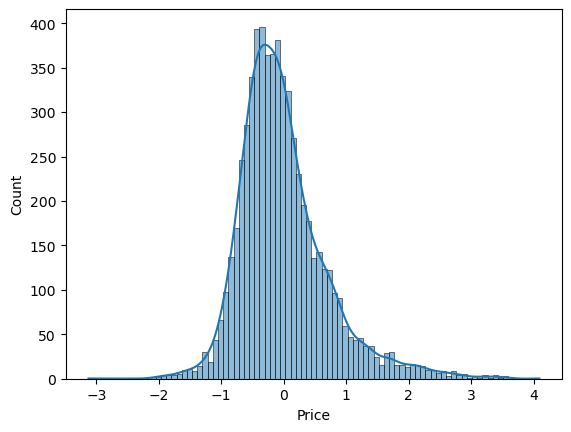

In [21]:
sns.histplot((y_test-y_pred),kde=True)

In [22]:
import dill

dill.dump(model,open('model.pkl','wb'))

model = dill.load(open('model.pkl','rb'))

model.predict(X_test_scaled)

array([1.40940584, 1.1427008 , 1.84150181, ..., 2.05570327, 2.42253886,
       2.35186104])